In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk import word_tokenize
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/My Drive/vaccination_all_tweets.csv')

In [4]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211189 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [6]:
df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [7]:
text_df = df[["text"]]

In [8]:
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [9]:
print(text_df["text"].iloc[0],"\n")
print(text_df["text"].iloc[1],"\n")
print(text_df["text"].iloc[2],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 



In [10]:
def data_process(text):
  text = text.lower()
  text = re.sub(r"https\S+|www\S+https\S+", "",text,flags = re.MULTILINE)
  text = re.sub(r"\@+|/#", "", text)
  text = re.sub(r"[^\w\s]","", text)
  text_token = word_tokenize(text)
  stop = stopwords.words("english")
  filter =[]
  for w in text_token:
    if w not in stop:
      filter.append(w)

  return " ".join(filter)

In [11]:
nltk.download('punkt')
nltk.download('stopwords')
text_df.text = text_df["text"].apply(data_process)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-11-3c9f1578f907>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df.text = text_df["text"].apply(data_process)


In [12]:
text_df.duplicated().sum()

16488

In [13]:
text_df.drop_duplicates(inplace = True)

<ipython-input-13-b7e3a93c9b5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df.drop_duplicates(inplace = True)


In [14]:
text_df.duplicated().sum()

0

In [15]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [16]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211719 entries, 0 to 228206
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    211719 non-null  object
dtypes: object(1)
memory usage: 3.2+ MB


In [19]:
ps = PorterStemmer()
data_new = []
def stemming(data):
  for i in data:
    text = [ps.stem(i)]
  return data


In [20]:
text_df["text"].apply(lambda x : stemming(x))

0         folks said daikon paste could treat cytokine s...
1         world wrong side history year hopefully bigges...
2         coronavirus sputnikv astrazeneca pfizerbiontec...
3         facts immutable senator even youre ethically s...
4         explain need vaccine borisjohnson matthancock ...
                                ...                        
228202    45 urban bengaluru covidvaccine availability 1...
228203    1844 bbmp bengaluru covidvaccine availability ...
228204    1844 urban bengaluru covidvaccine availability...
228205    promote vaccines leaving stronger russia vacci...
228206    45 urban bengaluru covidvaccine availability 1...
Name: text, Length: 211719, dtype: object

In [21]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [22]:
from textblob import TextBlob
def polar(text):
  return TextBlob(text).sentiment.polarity

In [23]:
text_df["polarity"] = text_df["text"].apply(polar)

<ipython-input-23-b4db19e2e92e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["polarity"] = text_df["text"].apply(polar)


In [25]:
text_df.head(10)

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [27]:
def sentiment(txt):
  if txt < 0:
    return "Negative"
  elif txt == 0:
    return "Neutral"
  else:
    return "Positive"
text_df["Sentiment"] = text_df["polarity"].apply(sentiment)

<ipython-input-27-d8424be7ec22>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["Sentiment"] = text_df["polarity"].apply(sentiment)


In [28]:
text_df.head(10)

,text,polarity,Sentiment
0,folks said daikon paste could treat cytokine s...,0.000,Neutral
1,world wrong side history year hopefully bigges...,-0.500,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000,Neutral
3,facts immutable senator even youre ethically s...,0.100,Positive
4,explain need vaccine borisjohnson matthancock ...,0.000,Neutral
5,anyone useful adviceguidance whether covid vac...,0.400,Positive
6,bit sad claim fame success vaccination patriot...,-0.100,Negative
7,many bright days 2020 best 1 bidenharris winni...,0.675,Positive
8,covid vaccine getting covidvaccine covid19 pfi...,0.000,Neutral
9,covidvaccine states start getting covid19vacci...,0.000,Neutral


<Axes: xlabel='Sentiment', ylabel='count'>

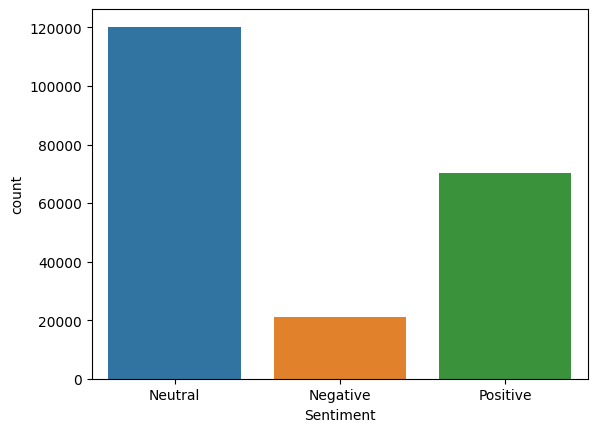

In [29]:
sns.countplot(data = text_df, x="Sentiment")

In [31]:
Pos_tweets = text_df[text_df.Sentiment == "Positive"]
Pos_tweets.sort_values("polarity", ascending = False)

,text,polarity,Sentiment
100018,happened coronil misleading everyone pandemic ...,1.000000e+00,Positive
224348,say ive boosted thank koat7news wonderful staf...,1.000000e+00,Positive
216949,moderna plunged thursday losing place best per...,1.000000e+00,Positive
56706,getting side effects vaccine kinda like best d...,1.000000e+00,Positive
186225,httweets pm travelling usa sept 24 2021 taken ...,1.000000e+00,Positive
...,...,...,...
101572,got doubt taking covid vaccin clear doubt curi...,6.938894e-18,Positive
166430,pink clearly states choice moderna say mandatory,6.938894e-18,Positive
9760,theres smth fast amp simple incompetent amp sl...,6.938894e-18,Positive
64762,2nd vaccination dose 16 hours running lowgrade...,4.625929e-18,Positive


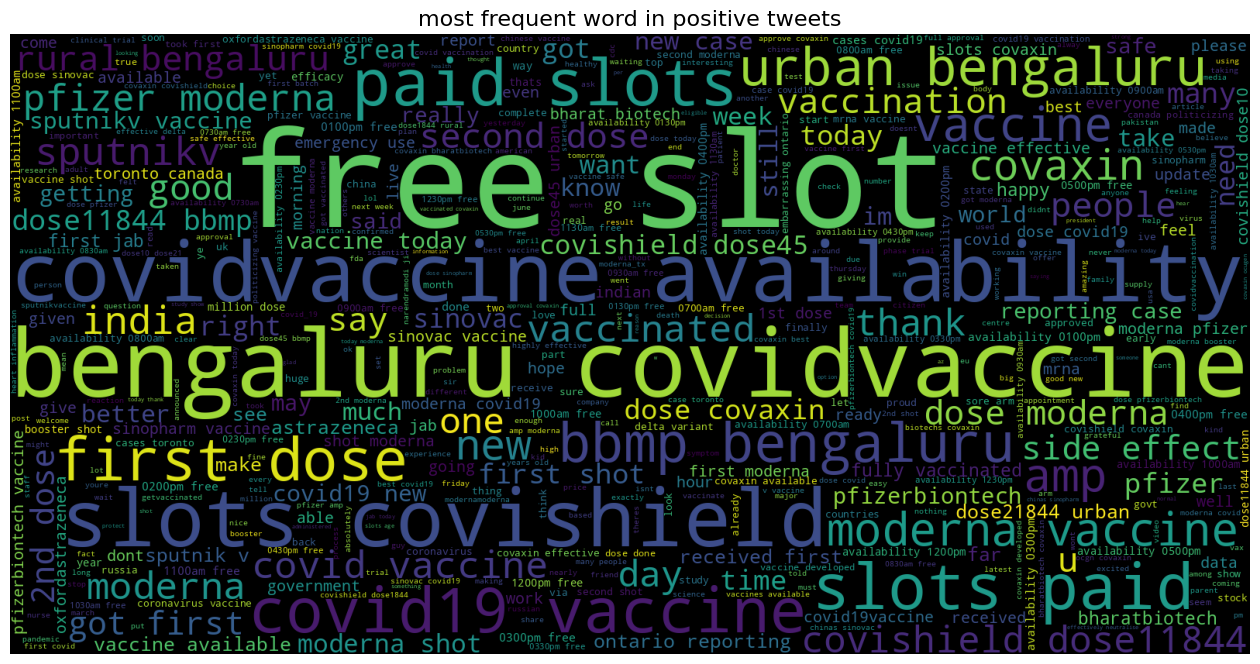

In [ ]:
text =''.join([word for word in Pos_tweets['text']])
plt.figure(figsize = (16,14))
wordcloud = WordCloud(max_words=500, width =1600,height=800).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("most frequent word in positive tweets", fontsize =16)
plt.show()